# Capstone Project - The Battle of Neighborhoods in Miami

## Introduction:

This is the final assingment of Cousera Applied Data Science Capstones (part of Courseras Applied Data Science Specialization) course. This project is about learning how to use the knowleage given to my own project.

I am going to do mine Peer-graded Assingment of Miami, because I am interested of visiting there in the feture - more about my choice in the next chapter on this notebook.

This is my first time ever doing anything like this, actualla first time ever dealing with dataset, so I am going to keep this project so simply as possible.

## Description of the problem and discussion of the backround:

I choosed to do this project of Miami neighborhoods and venues. This project is based on an idea, that trending travel agency wants to start selling "do it one your own" vagations and they hired me to analysize what they shuold recommentate to customers or book for them. Of course, best way on ideal way to sell "almous like you book it your self" and "live like locals" holidays, is to solve how does the locals spend their time.

Problem wich I´m trying to solve in this project is: If customer is about to travel or thingking of travelling to Miami - wich neighborhoods are the best to stay? People and customer want different things, so I will make on analysis from different perpectives:
for beach holiday
for cultural holiday
for shopping holiday 
and for both beach and something else to do easily also.

I´m trying to solve this problem in this project by first gatering Miami Neighborhoods and gettin Forsquare data on venues and then analysing these datasets by gruoping them into venue gategories and finally clustering them to these fuor gategories I mentioned before: Beach Cultural Shopping Both Beach and something else to do also

Perhaps I will find some other gategorie on the way to, but this is the starting point of this project.

## Description of the data and how it will be used to solve the problem:

In my project I will use data from Wikipedia page https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami and Forsquare data off Miamis venues.

In Wikipedia data I´ll found data of neigbourhoods and their geographical goordinates. Data also includes data of: Demomyn, Population 2020, Populalation/km2 and Sub-neighborhoods. I´m going to clean those out of my data, cause I´m going to keep this project simple. If this project wuold be about moving to Miami or bying a condo from there I think I wuold also use Population/km2 data and look closely to Sub-neighborhoods, but in this point the knowleage of those are not meaningfull.

More meaning to this project will come from Forsquare data of venues in Miami neighborhoods. I´m goint to use this data to locate places where local people often go. I believe that the best and cheepest way to get to know the city is to trust people who live there - we do they often go and what do they do? Forsquare data will tell me this and that is why I choose to use it in this project. Forsquare data is also really good for my purpose - lets not forget that I´m doing this project for my employer who wants to know what kind of travelling plans to make for their new trending market.

## Methodology section

### Importing Datasets 

Lets begin. At first I will do some bacground things to install and import needed libraries. 

In [1]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# at first i import needed libraries 
import pandas as pd
import numpy as np

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Then I will import the dataset from wikipedia site and clean it so that I can use it later. Data I need from this site is data of neigbourhoods and their geographical goordinates. 

In [401]:
data_path = "https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami"
miami_data = pd.read_html(data_path)
miami_neigbourhoods = miami_data[0]
miami_neigbourhoods.head()

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257


### Data cleaning

Columns Demonym, Population2010, Sub-neighborhoods, Population/Km² are not needeed, so I clean them out.
Information in cells 11 and 25 are not inportant for my project and they don´t have coordinates, so I will clean them out.
Data looks like below now. Coordinates are both latitude and lognitude in the same column, so I will separate them and name correctly. I also will delete column Coordinates, cause I don´t need it.

In [402]:
miami_neigbourhoods = miami_neigbourhoods.drop(["Demonym", "Population2010", "Sub-neighborhoods", "Population/Km²"], axis=1)
miami_neigbourhoods = miami_neigbourhoods.drop([11,25]).reset_index(drop =True)
miami_neigbourhoods.head()

,Neighborhood,Coordinates
0,Allapattah,25.815-80.224
1,Arts & Entertainment District,25.799-80.190
2,Brickell,25.758-80.193
3,Buena Vista,25.813-80.192
4,Coconut Grove,25.712-80.257


In [403]:
miami_neigbourhoods[['Latitude','Longitude']] = miami_neigbourhoods['Coordinates'].str.split("-",expand=True)
miami_neigbourhoods['Longitude'] = miami_neigbourhoods['Longitude'].astype(float)
miami_neigbourhoods['Latitude'] = miami_neigbourhoods['Latitude'].astype(float)
miami_neigbourhoods['Longitude'] = miami_neigbourhoods['Longitude']*-1
miami_neigbourhoods = miami_neigbourhoods.drop(["Coordinates"], axis=1)
miami_neigbourhoods.head()

,Neighborhood,Latitude,Longitude
0,Allapattah,25.815,-80.224
1,Arts & Entertainment District,25.799,-80.190
2,Brickell,25.758,-80.193
3,Buena Vista,25.813,-80.192
4,Coconut Grove,25.712,-80.257


In [404]:
print(miami_neigbourhoods.shape)
print('The dataframe has {} neighborhoods.'.format(
        len(miami_neigbourhoods['Neighborhood'].unique()),
        miami_neigbourhoods.shape[0]
    )
)

(24, 3)
The dataframe has 24 neighborhoods.


Now the data of Miami´s neighborhoods and their latitudes and lognitudes are ready to use later.

##### Visualising dataset

Before I go on i visualize the data of Miami neighborhoods by using Folium map.

At first tho I use Nominatim from goegoders package to get the goegraphical coordinates of Miami.

In [405]:
address = 'Miami'

geolocator = Nominatim(user_agent="miami_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7742658, -80.1936589.


In [406]:
latitude = 25.7742658
longitude = -80.1936589

In [407]:
# creating map of Miami using latitude and longitude values
map_miami = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(miami_neigbourhoods['Latitude'], miami_neigbourhoods['Longitude'], miami_neigbourhoods['Neighborhood']):
    label = '{}, {}'.format(miami_neigbourhoods, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

Abowe you can see a map of Miami´s neighborhoods, each marked by blue cirkle. As we can see, neighbourhoods I´m handeling with are in centre of Miami and distances are not so far away from each other. Later on this means, that when I pick the venues nearby neighborhoods I will use 2 km radar to each Neighborhoods centre to locate the venues nearby.

### Importin Forsquare data

#### Importin Forsquare data of Allapattah

To work with Forsquare data I will at first have to give my Forsquare client ID and SECRET and tell the version I want to use. After that I can go on adding the Forsquare data to my data of Miami

In [408]:
# at first I have to give my credentials for Foursquare using
import getpass
CLIENT_ID = getpass.getpass('client_id: ')

client_id: ········


In [410]:
CLIENT_SECRET = getpass.getpass('client_secret: ')

client_secret: ········


In [411]:
VERSION = '20180605' # Foursquare API version

I will at first try does the Forsquare data work with my data with just one neighborhood. I pick up the first one which is Allapattah

In [430]:
miami_neigbourhoods.loc[0,'Neighborhood']

'Allapattah'

In [431]:
neighborhood_latitude = miami_neigbourhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = miami_neigbourhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = miami_neigbourhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Allapattah are 25.815, -80.224.


In [432]:
# getting the Forsqaure data
LIMIT = 100

radius = 1000

latitude = 25.815
longitude = -80.224

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=Y43CZE3Y3GG0ZGX0JSGEAOZN252FLXYGI5UQM4URMA25SO2J&client_secret=JFSW4ER3HVC51D3HFIRYDZXCRVLDBRAORR4PLSCCGDQJSGTQ&ll=25.815,-80.224&v=20180605&radius=1000&limit=100'

Send the GET request and examine the resutls

In [433]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0c627c521bc909ebe15e0a'},
 'response': {'headerLocation': 'Model City',
  'headerFullLocation': 'Model City, Miami',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 25.82400000900001,
    'lng': -80.21402093192553},
   'sw': {'lat': 25.805999990999993, 'lng': -80.23397906807448}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c71fa919e706dcb03dd4962',
       'name': 'Club Tipico Dominicano',
       'location': {'address': '1344 NW 36th St',
        'lat': 25.809557243228205,
        'lng': -80.21859267842743,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.809557243228205,
          'lng': -80.21859267842743},
         {'label': 'entrance', 'lat': 25.809

Because the information in Forsquare data is in the item keys i will make the get gategory type function and then clean the json and structure it into a pandas dataframe.

In [434]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [435]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Club Tipico Dominicano,Nightclub,25.809557,-80.218593
1,Family Dollar,Discount Store,25.807208,-80.223503
2,Winn-Dixie,Grocery Store,25.808179,-80.224911
3,Redbox,Video Store,25.808122,-80.224456
4,Charles Hadley Pool,Park,25.819565,-80.216753


In [436]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

11 venues were returned by Foursquare.


There are only 12 venues in Allapattah 1 km range from Allapattahs centre. It´s not much and perhaps by searching a little bit longer wuold give us little more result, but at this point is only relevant that function works.

#### Importing Forsquare data of Miamis neighborhoods

At first i will make the function work to many neighbourhoods at the same time. Like a told before, I´m going to use 3 km distance from neighbourhoods centre to locate the venues, cause areas are nearby, but still close to each other. And my goal is to think neighbourhoods for travelling - 3 km is somethong what almoust every one can walk. If I wuold run this with 2 km distance, I didn´t find any beaches.

In [437]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        


And then I will use function abowe to make a new dataframe of Miami´s neighbourhoods.

In [438]:
# type your answer here

miami_venues = getNearbyVenues(names=miami_neigbourhoods['Neighborhood'],
                                   latitudes=miami_neigbourhoods['Latitude'],
                                   longitudes=miami_neigbourhoods['Longitude']
                                  )


Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [439]:
print(miami_venues.shape)
miami_venues.head()

(2271, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Club Tipico Dominicano,25.809557,-80.218593,Nightclub
1,Allapattah,25.815,-80.224,Plaza Seafood Market,25.805638,-80.223992,Seafood Restaurant
2,Allapattah,25.815,-80.224,Snappers Fish & Chicken,25.824110,-80.224870,Seafood Restaurant
3,Allapattah,25.815,-80.224,Subs On The Run,25.802749,-80.207111,Sandwich Place
4,Allapattah,25.815,-80.224,Papo Llega y Pon,25.803466,-80.223886,Cuban Restaurant


### Cleaning the importet data of Miami´s venues.

After a little while of working with data i realised that venue gatogories in the dataset include in one category also Neighbourhood. It´s not on venue, so I will clean it up and then count the venues again. Now data looks correctly to use later on.

In [440]:
miami_venues = miami_venues[miami_venues['Venue Category']!='Neighborhood']
miami_venues.shape

(2252, 7)

In [441]:
# d = miami_venues.loc[miami_venues["Neighborhood"]=="Venetian Islands"]
# d.head()

In [442]:
miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,99,99,99,99,99,99
Arts & Entertainment District,98,98,98,98,98,98
Brickell,100,100,100,100,100,100
Buena Vista,98,98,98,98,98,98
Coconut Grove,100,100,100,100,100,100
Coral Way,99,99,99,99,99,99
Design District,98,98,98,98,98,98
Downtown,100,100,100,100,100,100
Edgewater,98,98,98,98,98,98


In [443]:
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 202 uniques categories.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99849dfd30>]],
      dtype=object)

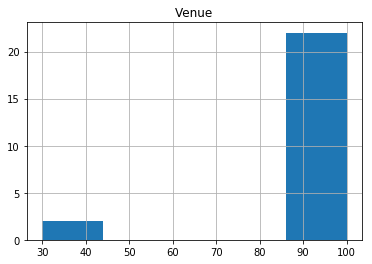

In [444]:
to_plot = miami_venues.groupby('Neighborhood').count()
to_plot = to_plot.drop(columns=["Neighborhood Latitude", "Neighborhood Longitude", "Venue Latitude", "Venue Longitude", "Venue Category"])
to_plot.hist(bins=5)

Most of the neighbourhoods have 88-100 unique venues - in Virginia Key and Liberty City are just few different venues.

Dataset telss me that I now have 2137 venues to analyze and unique categories of venues are 226. That means that local people (or visitors who use Forsquare) visit a lots of kinds different places. I could clean the amount a little bit less and visualize gategories, but to my goal it´s worthels, so I´m happy with this amount and go on.

To use data abowe I need to index data so that it possible to count venues. That´s why I use one hot encoding to make a nwe datafreme to analyze more.

In [445]:
# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")
miami_onehot['Neighborhood'] = miami_venues['Neighborhood']
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]
miami_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis of the data

After encoding I can gruop neihgbourhoods and take the mean of frequency of occurence of each category. Result is shown below.


In [446]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Allapattah,0.0,0.0,0.0,0.0,0.010101,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.010101,0.000000,0.000000,0.0,0.0
1,Arts & Entertainment District,0.0,0.0,0.0,0.0,0.010204,0.0,0.000000,0.010204,0.000000,...,0.0,0.0,0.010204,0.020408,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,Brickell,0.0,0.0,0.0,0.0,0.020000,0.0,0.000000,0.000000,0.040000,...,0.0,0.0,0.000000,0.010000,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,Buena Vista,0.0,0.0,0.0,0.0,0.010204,0.0,0.010204,0.010204,0.010204,...,0.0,0.0,0.010204,0.010204,0.0,0.000000,0.010204,0.010204,0.0,0.0
4,Coconut Grove,0.0,0.0,0.0,0.0,0.030000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.030000,0.020000,0.0,0.0


###### TOP Venues in Virginia Key

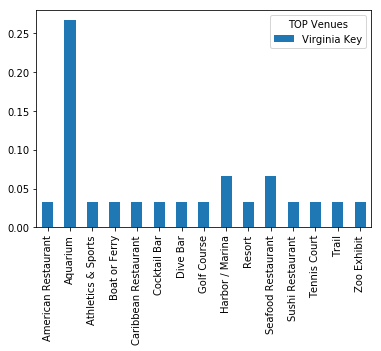

In [447]:
virginiaKey_top = miami_grouped.iloc[[21]]
virginiaKey_top = virginiaKey_top.transpose()
virginiaKey_top = virginiaKey_top[virginiaKey_top[21] !=0]
virginiaKey_top = virginiaKey_top[virginiaKey_top[21] !=0.1]
virginiaKey_top = virginiaKey_top.drop(["Neighborhood"])
virginiaKey_top = virginiaKey_top.rename_axis("TOP Venues", axis="columns")
virginiaKey_top = virginiaKey_top.rename(columns={21:"Virginia Key"})
virginiaKey_top.plot(kind="bar")

###### TOP Venues in Venetian Islands

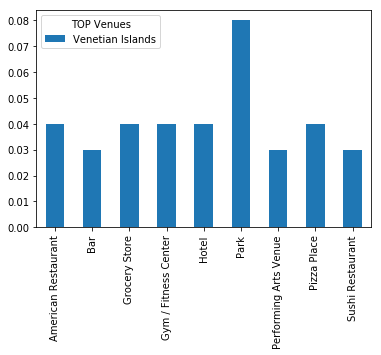

In [448]:
venetian_top = miami_grouped.iloc[[20]]
venetian_top = venetian_top.transpose()
venetian_top = venetian_top[venetian_top[20] !=0]
venetian_top = venetian_top[venetian_top[20] !=0.01]
venetian_top = venetian_top[venetian_top[20] !=0.02]
venetian_top = venetian_top.drop(["Neighborhood"])
venetian_top = venetian_top.rename_axis("TOP Venues", axis="columns")
venetian_top = venetian_top.rename(columns={20:"Venetian Islands"})
venetian_top.plot(kind="bar")

###### TOP Venues in Coconut Grove

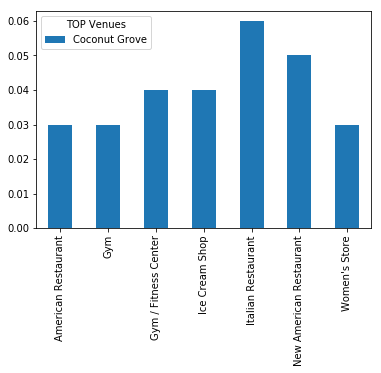

In [449]:
coco_top = miami_grouped.iloc[[4]]
coco_top = coco_top.transpose()
coco_top = coco_top[coco_top[4] !=0]
coco_top = coco_top[coco_top[4] !=0.01]
coco_top = coco_top[coco_top[4] !=0.02]
coco_top = coco_top.drop(["Neighborhood"])
coco_top = coco_top.rename_axis("TOP Venues", axis="columns")
coco_top = coco_top.rename(columns={4:"Coconut Grove"})
coco_top.plot(kind="bar")

###### TOP Venues in Buena Vista 3

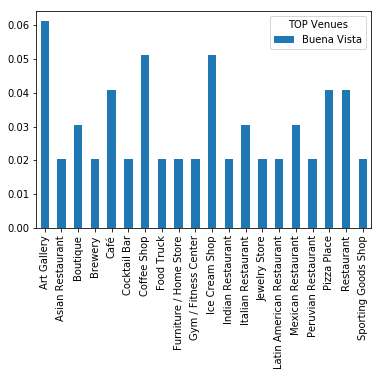

In [450]:
buev_top = miami_grouped.iloc[[3]]
buev_top = buev_top.transpose()
buev_top = buev_top[buev_top[3] !=0]
buev_top = buev_top.drop(["Neighborhood"])
buev_top = buev_top.drop(["Yoga Studio", "American Restaurant", "Arcade", "Arepa Restaurant","Argentinian Restaurant", "Bakery", "Bar", "Big Box Store", "Breakfast Spot", "Caribbean Restaurant", "Clothing Store","Convenience Store",
                         "Cuban Restaurant", "Cupcake Shop", "Dessert Shop", "Discount Store", "Donut Shop", "Fast Food Restaurant", "Gun Range", "Indie Movie Theater", "Juice Bar", "Leather Goods Store",
                         "Mediterranean Restaurant", "New American Restaurant", "Public Art", "Women's Store", "Optical Shop", "Pet Store","Shopping Mall", "Wine Shop", "Wine Bar", "Vegetarian / Vegan Restaurant",
                         "Theater", "Tapas Restaurant", "Taco Place", "Spiritual Center", "South American Restaurant", "Scenic Lookout", "Seafood Restaurant"])
buev_top = buev_top.rename_axis("TOP Venues", axis="columns")
buev_top = buev_top.rename(columns={3:"Buena Vista"})
buev_top.plot(kind="bar")


Let´s check where is Art Galleries

1

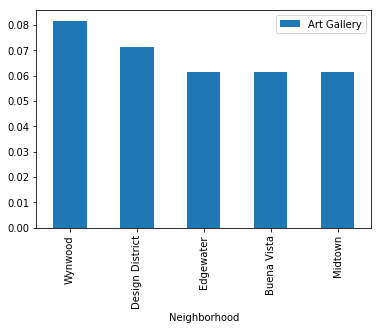

In [451]:
top5_artG = miami_grouped.sort_values(by="Art Gallery", ascending=False).head()
top5_artG = top5_artG.iloc[:, lambda top5_artG: [0,10]]
top5_artG.set_index("Neighborhood").plot(kind="bar", layout="Neighborhood")
top5_artG.columns.get_loc("Art Gallery")


It seems that Art Galleries are mostly in Wynwood, Desing District, Edgewater, Buana Vista and Midtown

Lets check were is the beaches

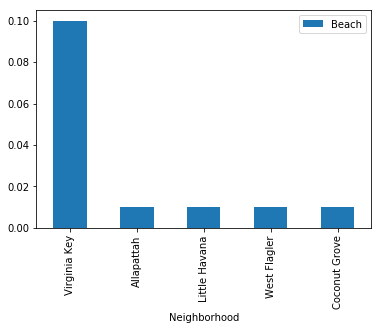

In [452]:
top5_beaches = miami_grouped.sort_values(by="Beach", ascending=False).head()
top5_beaches.columns.get_loc("Beach")
top5_beaches = top5_beaches.iloc[:, lambda top5_Americanrest: [0,23]]
top5_beaches.set_index("Neighborhood").plot(kind="bar", layout="Neighborhood")

Beches are mostly on Virginia Key

How about the American restaurants?

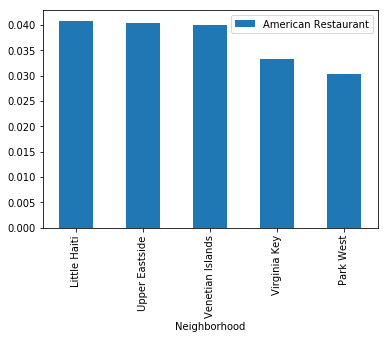

In [453]:
top5_Americanrest = miami_grouped.sort_values(by="American Restaurant", ascending=False)
top5_Americanrest = top5_Americanrest.head()
top5_Americanrest2 = top5_Americanrest.loc[:,"American Restaurant"]
top5_Americanrest3 = top5_Americanrest.iloc[:, lambda top5_Americanrest: [0,5]]
top5_Americanrest3_plot = top5_Americanrest3.set_index("Neighborhood").plot(kind="bar", layout="Neighborhood")

American restaurants you will find most likely from Little Haiti, Upper East Side and Venetian Islands

Now I make a top 5 venues list to every neigbourhoods to look at. By looking at top 5 venues I can say that neighbourhoods are not similar, some of them looklike the same, but some of them are unique.

In [454]:
num_top_venues = 5

for hood in miami_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = miami_grouped[miami_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
                  venue  freq
0           Art Gallery  0.06
1        Sandwich Place  0.04
2  Fast Food Restaurant  0.03
3    Seafood Restaurant  0.03
4      Cuban Restaurant  0.03


----Arts & Entertainment District----
            venue  freq
0      Restaurant  0.07
1     Art Gallery  0.06
2  Ice Cream Shop  0.06
3     Coffee Shop  0.05
4         Brewery  0.04


----Brickell----
                    venue  freq
0                   Hotel  0.10
1      Italian Restaurant  0.08
2  Argentinian Restaurant  0.04
3     Japanese Restaurant  0.04
4                     Bar  0.04


----Buena Vista----
            venue  freq
0     Art Gallery  0.06
1     Coffee Shop  0.05
2  Ice Cream Shop  0.05
3      Restaurant  0.04
4            Café  0.04


----Coconut Grove----
                     venue  freq
0       Italian Restaurant  0.06
1  New American Restaurant  0.05
2     Gym / Fitness Center  0.04
3           Ice Cream Shop  0.04
4                      Gym  0.03


----Coral Way---

First, let's write a function to sort the venues in descending order based on the mean of the frequency of occurrence of each category. After doing that I will greate a new dataframe of top 10 venyes by each neighbourhood.

In [455]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [456]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
miami_venues_sorted = pd.DataFrame(columns=columns)
miami_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    miami_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

miami_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Art Gallery,Sandwich Place,Seafood Restaurant,Caribbean Restaurant,Bar,Bakery,Fast Food Restaurant,Clothing Store,Cuban Restaurant,Fried Chicken Joint
1,Arts & Entertainment District,Restaurant,Ice Cream Shop,Art Gallery,Coffee Shop,Bar,Brewery,Park,Mexican Restaurant,Asian Restaurant,Gym / Fitness Center
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Restaurant,Spa,Lounge,Latin American Restaurant,Seafood Restaurant
3,Buena Vista,Art Gallery,Ice Cream Shop,Coffee Shop,Pizza Place,Restaurant,Café,Mexican Restaurant,Italian Restaurant,Boutique,Jewelry Store
4,Coconut Grove,Italian Restaurant,New American Restaurant,Ice Cream Shop,Gym / Fitness Center,Women's Store,Gym,American Restaurant,Sporting Goods Shop,Farmers Market,Bakery
5,Coral Way,Bakery,Café,Italian Restaurant,Cuban Restaurant,Pizza Place,Steakhouse,Bookstore,Burger Joint,Restaurant,Grocery Store
6,Design District,Art Gallery,Ice Cream Shop,Coffee Shop,Café,Restaurant,Italian Restaurant,Brewery,Mexican Restaurant,Pizza Place,Furniture / Home Store
7,Downtown,Hotel,Seafood Restaurant,Italian Restaurant,Park,Restaurant,Residential Building (Apartment / Condo),Peruvian Restaurant,Bar,Japanese Restaurant,Lounge
8,Edgewater,Ice Cream Shop,Restaurant,Art Gallery,Coffee Shop,Brewery,Asian Restaurant,Bar,Pizza Place,Mexican Restaurant,Gym / Fitness Center
9,Flagami,Cuban Restaurant,Coffee Shop,Latin American Restaurant,Grocery Store,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Chinese Restaurant,Gym / Fitness Center


Now I have listed each neighbourhoods with their 10 most common venues. 

After examinating the list it´s hard to say directly how does the neihgbourhoods diverge to each others. Some of then most common venue is restaurant or hotel, some of art callery. Tho from this data I can make a default that every neihgborhood is a city neigbourhood - everyvere in Miami is something to do and something to eat. So basecly it doesn´t matter where to go there if u just want to hang around. Crapeland Heighs is doubtless an Airport area with airport services and in Brickell is many venues to be on a vagation. From Venetian Islands can doubtless get a ferry and in Virginia Key is also Harbor /Marina and beach.

To make easier to anlysize neighbourhoods I will cluster neighbourhoods to 9 clusters to see wich of the neighbourhoods wuold be the best for my client customers.

I tested clustering in different amount of labels and there´s always few neighbourhoods clearly different than others. Airport area comes out allways and Virginia Key is the second one to come out from others. After while clustering I ended up to 9 clusters - my goal is to provide data on different kinds of neighbourhoods to spen time on, so I dont´t want clusters to bee too big and more clusters brought out just good things.

In [457]:
# set number of clusters
kclusters = 9

miami_grouped_clustering = miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

for label in range(kclusters):
    cnt = list(kmeans.labels_).count(label)
    print(f"Label {label} count: {cnt}")

Label 0 count: 6
Label 1 count: 1
Label 2 count: 5
Label 3 count: 1
Label 4 count: 2
Label 5 count: 4
Label 6 count: 1
Label 7 count: 3
Label 8 count: 1


In [458]:
# add clustering labels
miami_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merged = miami_neigbourhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
miami_merged = miami_merged.join(miami_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

miami_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,25.815,-80.224,3,Art Gallery,Sandwich Place,Seafood Restaurant,Caribbean Restaurant,Bar,Bakery,Fast Food Restaurant,Clothing Store,Cuban Restaurant,Fried Chicken Joint
1,Arts & Entertainment District,25.799,-80.190,0,Restaurant,Ice Cream Shop,Art Gallery,Coffee Shop,Bar,Brewery,Park,Mexican Restaurant,Asian Restaurant,Gym / Fitness Center
2,Brickell,25.758,-80.193,2,Hotel,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Restaurant,Spa,Lounge,Latin American Restaurant,Seafood Restaurant
3,Buena Vista,25.813,-80.192,0,Art Gallery,Ice Cream Shop,Coffee Shop,Pizza Place,Restaurant,Café,Mexican Restaurant,Italian Restaurant,Boutique,Jewelry Store
4,Coconut Grove,25.712,-80.257,5,Italian Restaurant,New American Restaurant,Ice Cream Shop,Gym / Fitness Center,Women's Store,Gym,American Restaurant,Sporting Goods Shop,Farmers Market,Bakery


### Visualising Miami´s neighborhoods venues

In [459]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In the map shown abouw we can see the labels 0- 8 in different colours.
Label 0 = Red
Label 1 = Violet
Label 2 = Blue
Label 3 = Light Blue
Label 4 = Turquoise
Label 5 = Light Green
Label 6 = Green
Label 7 = Light Orange
Label 8 = Orange


### Analysis of the clusters

In [460]:
miami_merged.loc[miami_merged['Cluster Labels'] == 0, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arts & Entertainment District,Restaurant,Ice Cream Shop,Art Gallery,Coffee Shop,Bar,Brewery,Park,Mexican Restaurant,Asian Restaurant,Gym / Fitness Center
3,Buena Vista,Art Gallery,Ice Cream Shop,Coffee Shop,Pizza Place,Restaurant,Café,Mexican Restaurant,Italian Restaurant,Boutique,Jewelry Store
6,Design District,Art Gallery,Ice Cream Shop,Coffee Shop,Café,Restaurant,Italian Restaurant,Brewery,Mexican Restaurant,Pizza Place,Furniture / Home Store
8,Edgewater,Ice Cream Shop,Restaurant,Art Gallery,Coffee Shop,Brewery,Asian Restaurant,Bar,Pizza Place,Mexican Restaurant,Gym / Fitness Center
15,Midtown,Ice Cream Shop,Art Gallery,Restaurant,Brewery,Café,Pizza Place,Coffee Shop,Mexican Restaurant,Boutique,Asian Restaurant
23,Wynwood,Art Gallery,Ice Cream Shop,Restaurant,Coffee Shop,Bar,Brewery,Pizza Place,Mexican Restaurant,Asian Restaurant,Gym / Fitness Center


Cluster 0 contains like cluster 2 lots of restaurants and coffee shops, but not so many hotels. Restaurants also seem to be more like "normal" food than in cluster 2. Here visitors can eat most likely also cheeper than in cluster 2. Mostly neigbourhoods offer Art and relaxing tho. Desing and Arts and entertainmenst are most likely to been found from here.

In [461]:
miami_merged.loc[miami_merged['Cluster Labels'] == 1, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Virginia Key,Aquarium,Beach,Park,Harbor / Marina,Seafood Restaurant,Zoo Exhibit,Golf Course,Cocktail Bar,Trail,Athletics & Sports


Cluster 1 is basicly Virginia Key. From here visitors can find Park, Beach, Harbor/Marina, Golf and Tennis and Athletics & Sports. Suonds like a great place for visitors who wants beach and sports and are willing to walk a little bit to go shopping and eating and so on.

In [462]:
miami_merged.loc[miami_merged['Cluster Labels'] == 2, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Restaurant,Spa,Lounge,Latin American Restaurant,Seafood Restaurant
7,Downtown,Hotel,Seafood Restaurant,Italian Restaurant,Park,Restaurant,Residential Building (Apartment / Condo),Peruvian Restaurant,Bar,Japanese Restaurant,Lounge
13,Little Havana,Hotel,Latin American Restaurant,Seafood Restaurant,Italian Restaurant,Argentinian Restaurant,Bar,Spanish Restaurant,Grocery Store,Restaurant,Trail
14,Lummus Park,Hotel,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Restaurant,Pizza Place,Latin American Restaurant,Park,Peruvian Restaurant
18,The Roads,Italian Restaurant,Hotel,Bar,Argentinian Restaurant,Latin American Restaurant,Mexican Restaurant,Spanish Restaurant,Seafood Restaurant,Cuban Restaurant,Pharmacy


Cluster 2 contains hotels and restaurant and bars. These neighbourhoods wuold be a great place to stay for those travellers who wants to eat well and drink enough. For my purpose = to find a neighbourhood where locals also go often and hang around and live in Airbnb this is not so good neighbourhoods. 

Restaurants in this area´s are specialist very much - Italian, Seafood, Japanese, Latin American, Cuban, Asian and even Spanish Restaurangs are here.

In [463]:
miami_merged.loc[miami_merged['Cluster Labels'] == 3, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Art Gallery,Sandwich Place,Seafood Restaurant,Caribbean Restaurant,Bar,Bakery,Fast Food Restaurant,Clothing Store,Cuban Restaurant,Fried Chicken Joint


Cluster 3 is also a city area. Not so many arts galleries than in cluster 0 or hotels than in cluster two - more shops and coffee places.

In [464]:
miami_merged.loc[miami_merged['Cluster Labels'] == 4, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Flagami,Cuban Restaurant,Coffee Shop,Latin American Restaurant,Grocery Store,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Chinese Restaurant,Gym / Fitness Center
22,West Flagler,Latin American Restaurant,Cuban Restaurant,Bakery,Grocery Store,Mexican Restaurant,Seafood Restaurant,Pizza Place,Thai Restaurant,Baseball Stadium,Tapas Restaurant


Cluster 3 seems to be neighbourhoods where people live. Here you can find in most common venues list Grocery store, Bakery, Bank, Pharmacy, Gym and so on. This sounds like neighbourhoods to stay like "normal" miami people. From the first most common venues I assume that Cuban and Latin American people might live here.

In [465]:
miami_merged.loc[miami_merged['Cluster Labels'] == 5, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Coconut Grove,Italian Restaurant,New American Restaurant,Ice Cream Shop,Gym / Fitness Center,Women's Store,Gym,American Restaurant,Sporting Goods Shop,Farmers Market,Bakery
5,Coral Way,Bakery,Café,Italian Restaurant,Cuban Restaurant,Pizza Place,Steakhouse,Bookstore,Burger Joint,Restaurant,Grocery Store
12,Little Haiti,Italian Restaurant,Café,American Restaurant,Pizza Place,Coffee Shop,Park,Indian Restaurant,Sporting Goods Shop,Mexican Restaurant,Mediterranean Restaurant
19,Upper Eastside,Italian Restaurant,Café,Coffee Shop,Pizza Place,American Restaurant,Gym,Art Gallery,Bistro,Caribbean Restaurant,Gym / Fitness Center


In cluster 6 I will find most common venue, Italian restaurant. Might be, that Italian people live here. Here´s also shops, sporting and parks ans so on. This looks like a great place to stay if you love good and exspecially Italian food.

In [466]:
miami_merged.loc[miami_merged['Cluster Labels'] == 6, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Liberty City,Fast Food Restaurant,Discount Store,Fried Chicken Joint,Nightclub,Sandwich Place,Seafood Restaurant,Gas Station,Park,Caribbean Restaurant,Shoe Store


Cluster 4 also seems like a place where people live (Nightclub, Gas Station, Park and food places). I assume that this neihgbourhood is not so rich -in most common venues are Discount Store and Sandwich Place.

In [467]:
miami_merged.loc[miami_merged['Cluster Labels'] == 7, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Overtown,Art Gallery,Hotel,Restaurant,Bar,Ice Cream Shop,Park,American Restaurant,Peruvian Restaurant,Pizza Place,Residential Building (Apartment / Condo)
17,Park West,Hotel,Seafood Restaurant,Park,Art Gallery,Residential Building (Apartment / Condo),Pizza Place,Ice Cream Shop,Brewery,Restaurant,American Restaurant
20,Venetian Islands,Park,Grocery Store,American Restaurant,Hotel,Gym / Fitness Center,Pizza Place,Bar,Sushi Restaurant,Performing Arts Venue,Italian Restaurant


Cluster 4 is basicly Venetian Islands. Most common venue is Parks. Here is Hotels, Grocery stores, restaurants and bars and also a gym. In neighborhood also is Performing Arts venue, so this seems to be a good place for visitors who wants a little bit of everything. If you also look the map where this neighbourhood is - you will find that also a beach is nearby. Based on Crocery store I wuold say that people also live here - so I think that Airbnb wuold also find here good places to stay.

In [468]:
miami_merged.loc[miami_merged['Cluster Labels'] == 8, miami_merged.columns[[0] + list(range(4, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Grapeland Heights,Rental Car Location,Coffee Shop,Hotel,Cuban Restaurant,Latin American Restaurant,Airport Lounge,Bakery,Pizza Place,Airport Service,Clothing Store


Cluster 8 is Grapeland Heights - Airport is nearby here. I wuold not recommend to stay here.

## Discussion section

Problem wich I was trying to solve in this project was: 

If customer is about to travel or thingking of travelling to Miami - wich neighborhoods are the best to stay? People and customer want different things, so I will make on analysis from different perpectives:
for beach holiday
for cultural holiday
for shopping holiday 
and for both beach and something else to do easily also.

In my analysis I have compared neihgbourhoods to each other and clustered them into 9 different types of categories besed on venues nearby neighbourhoods. Analysis gies a good picture where wuold be a great place to stay for different types of travellers.

Let´s start by excluding neighbourhoods where I wuoldn´t recommend to travel if what clients customers wants a great holiday in singns of beach, cultural, shopping or a little bit of them all.
Exluded neighbourhoods are on my opinion based on this analyzis: 
cluster 6 Liberty City - presumably great places to live and stay - but so much like living area and far from the sea and city and actually not much to do.
cluster 8 Grapeland Heights	 - who wants to stay at airport? Nothing else needen to stay

So from 9 clusters I take out 2 and now I have 7 clusters. From them I can say:
City areas: clusters 0 and 2 and 3
Possibilities to have beach and parks nearby and still be in the middle of everythin, clusters 1 and 7
Want to live like locals? Cluster 4 and 5 is the best one for that

Hotels and city areas: There is two this kind of areas, how are they different?
Cluster 0 seems to be a city area with art galleries, Coffee shops, restaurants and boutiques. Most common venues are not hotels - actually in the 10 most common venues are not any hotels. Boutiques are in the most common venues only in Buena Vista - so if I wuold like to go shopping that wuold be a great place. 
Cluster 2 is lots of like cluster 0, but it most common venues are hotels. There´s also much more Bars and parks than in cluster 0.
Cluster 3 is for live like locals in neighbourhoods ful with restaurants, art galleries, coffee shops and so on - this seems like a good place. There are also bars if you are thirsty.
My conclusion is that cluster 0 is centre and 2 and 3 a little bit further.

If city is what customers wants - these are the neighbourhoods to go. For customers in my assingment wuold be the best either cluster 8 or 3 - three if customer is thirsty often.

Beach and parks sections are found in clusters 1 Virginia Key and 7 Venetian Islands. Difference between these clusters is mostly that in cluster 1 beach is nearby and there´s lots of opportunities do to sports aswell.
Cluster 7 provides more cultural experiments and happenings than sports, but also have more restaurants in common venues. So wich one to choose debends most of customer. Perhaps there will be more of apartments tho in cluster 7 to stay than in cluster 1.

Want to live like lokals i found to clusters, 4 and 5. Compairing these to each other it seems, that in cluster 5 is mostly Italian food and gyms and coffee shops and very much to do. In cluster 4 is not so many choises to eat different foods and the most common venues is Cuban and Latin American restaurant. I wuold recommend to visit cluster 5 of these clusters.

So now i have information from every cluster.

My conclusion is:
For Beach holiday - both cluster 1 and 7 are good, but beach is clearly in cluster 1.
For cultural holiday - cluster 0 is the best for this
For shopping holiday - also cluster 0, but good choises are also clusters 2 and 3. If customer is in my project wanting to stay at Airbnb cluster 3 is the best.
For both beach and something else to do - cluster 7 is the best choice.

For something else? As I did the analysis I found out one more. 
For live like locals in the city holiday - cluster 5 is my choice for that!

At this point it shuold be said, that my analysis is of Miami neighbourhoods. Miami Beach is an independed city, so Miami Bech neighbourhoods are not in my project. In the goal is to gi Miami, not Beach this results are relevant. But if thinking to go beach holiday, shuold really think about Miami Beach also. In Miami the nearest place of Miami Beaches is Venetian Islands.

## Conclusion section

In this project I have been studing and analysing neigbourhoods of Miami. 

Firs I have to say - that like a mentionde before - Miami Beach is an independed city, so that´s why beaches don´t come out so well as they can. If wanting a beach holiday, shuold so the research to Miami Beaches Venues also. At this project I concentrate only for Miami.

My goal was to find out where in Miami to go if customers want beach holiday, cultural holiday, or shopping holiday or something between them.

My recommendation will be:

For Beach holiday - both cluster 1 and 7 are good, but beach is clearly in cluster 1. (Virginia Key,Venetian Islands,Park West, Overtown)

For cultural holiday - cluster 0 is the best for this (Arts & Entertainment District, Buena Vista, Design District, Edgewater, Midtown, Wynwood)

For shopping holiday - also cluster 0, but good choises are also clusters 2 and 3. If customer is in my project wanting to stay at Airbnb cluster 3 is the best. (Arts & Entertainment District, Buena Vista, Design District, Edgewater, Midtown, Wynwood / Brickell, Downtown, Little Havana, Lummus Park, The Roads / Allapattah)

For both beach and something else to do - cluster 7 is the best choice. (Venetian Islands,Park West, Overtown)